<a href="https://colab.research.google.com/github/AnanyaUp/Quantum-Machine-Learning/blob/main/QML_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The No-Cloning Theorem**

In [ ]:
# Copying a variable
my_var = 1
copy_of_my_var = my_var
print (my_var, copy_of_my_var)

1 1


**How To Solve A Problem With Quantum Computing**

In [ ]:
!pip install qiskit
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 53.2 MB/s eta 0:00:00


In [ ]:
#  Deutsch's algorithm
from math import sqrt
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def solve(oracle):
    """
    A reusable function that identifies whether the oracle represents
    a constant or a balanced function.
    """

    qu = QuantumRegister(2)
    cl = ClassicalRegister(1)

    # initialize the circuit
    qc = QuantumCircuit(qu,cl)

    # Prepare the input state of the oracle
    qc.x(1)

    qc.h(0)
    qc.h(1)

    # Apply the Oracle
    oracle(qc)

    # Prepare the output state
    qc.h(0)

    # measure qubit-0
    qc.measure(qu[0], cl[0])

    # Tell Qiskit how to simulate our circuit
    backend = Aer.get_backend('qasm_simulator')

    # execute the qc
    job = backend.run(qc, shots = 1000)
    results = job.result().get_counts()

    # plot the results
    return plot_histogram(results)

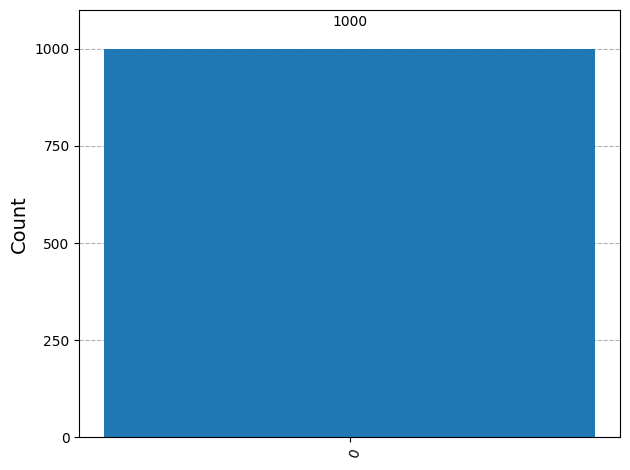

In [ ]:
# Apply the gate o‐0
def o_0(qc):
    pass

solve(o_0)

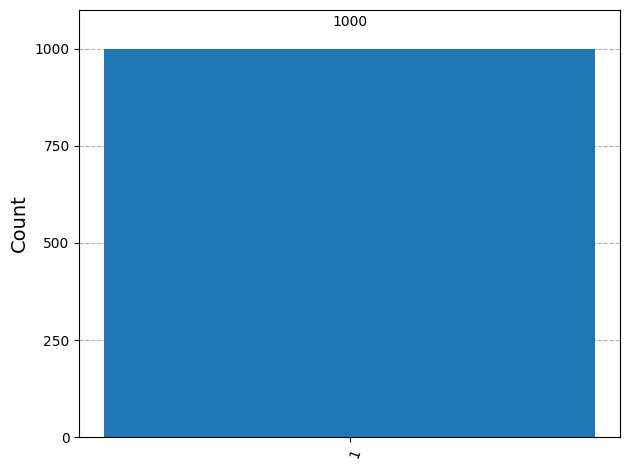

In [ ]:
# Apply the gate o‐1
def o_1(qc):
    qc.cx(0,1)

solve(o_1)

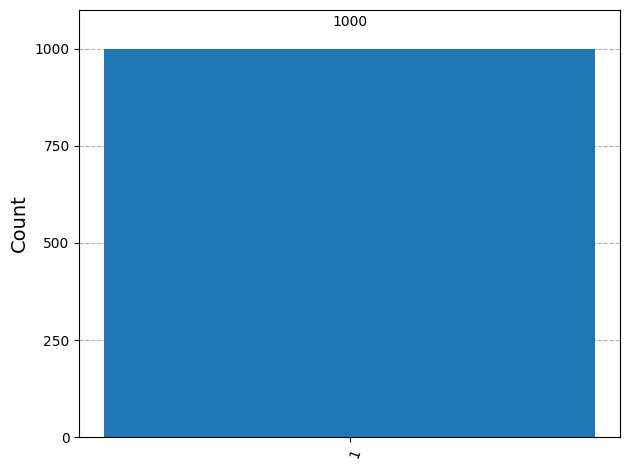

In [ ]:
# Apply the gate o‐2
def o_2(qc):
    qc.x(0)
    qc.cx(0,1)
    qc.x(0)

solve(o_2)

In [ ]:
import matplotlib.pyplot as plt
def run_with_oracle(oracle):

    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1)

    # toss the coin
    qc.h(0)

    # apply the oracle
    oracle(qc)

    # catch the coin
    qc.h(0)

    # Tell Qiskit how to simulate our circuit
    backend = Aer.get_backend('statevector_simulator')

    # Do the simulation, returning the result
    result = backend.run(qc).result()

    # get the probability distribution
    return result.get_counts()

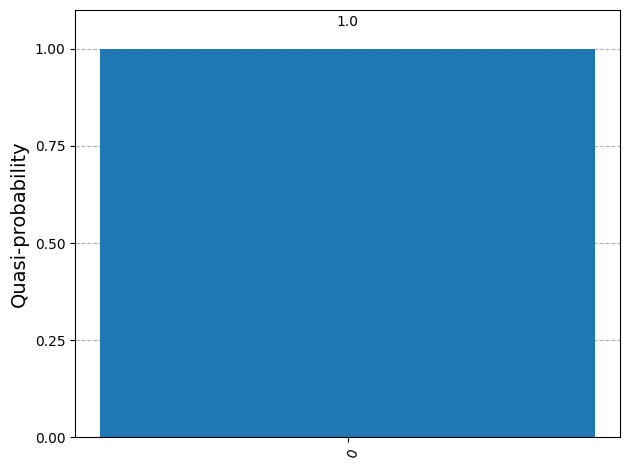

In [ ]:
plot_histogram(run_with_oracle(lambda qc: qc.id(0)))

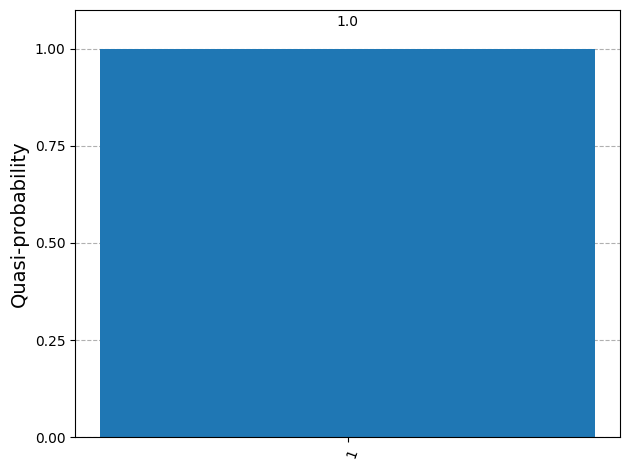

In [ ]:
# Run the tails up prediction
from math import pi
plot_histogram(run_with_oracle(lambda qc: qc.ry(pi, 0)))